In [ ]:
import pandas as pd
import numpy as np

import math
import warnings
import string

import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import SequentialFeatureSelector

import seaborn as sns

warnings.filterwarnings("ignore")


In [ ]:
cvd_data = pd.read_csv("/content/sample_data/cardio_data.csv", sep=";")

In [ ]:
cvd_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
print(f"Number of columns: { cvd_data.shape[1] }")
print(f"Number of rows: { cvd_data.shape[0] }")

Number of columns: 13
Number of rows: 70000


In [ ]:
cvd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
cvd_data.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
def detect_outliers(df,q1,q3):
  for col in df.columns:
    df_feature = df[col]
    Q1 = df_feature.quantile(q1)
    Q3 = df_feature.quantile(q3)  
    IQR = Q3 - Q1    
    print(f'Feature_name: {col}-------------')
    print(f'Percentiles: {int(q1*100)}th={Q1}, {int(q3*100)}th={Q3}, IQR={IQR}')
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = [x for x in df_feature if x < lower or x > upper]
    print('Identified outliers: %d \n' % len(outliers))
  
detect_outliers(cvd_data[['age',	'gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'cholesterol',	'gluc',	'smoke'	,'alco',	'active']],0.05,0.95)

Feature_name: age-------------
Percentiles: 5th=15069.0, 95th=23259.0, IQR=8190.0
Identified outliers: 0 

Feature_name: gender-------------
Percentiles: 5th=1.0, 95th=2.0, IQR=1.0
Identified outliers: 0 

Feature_name: height-------------
Percentiles: 5th=152.0, 95th=178.0, IQR=26.0
Identified outliers: 49 

Feature_name: weight-------------
Percentiles: 5th=55.0, 95th=100.0, IQR=45.0
Identified outliers: 22 

Feature_name: ap_hi-------------
Percentiles: 5th=100.0, 95th=160.0, IQR=60.0
Identified outliers: 50 

Feature_name: ap_lo-------------
Percentiles: 5th=70.0, 95th=100.0, IQR=30.0
Identified outliers: 1036 

Feature_name: cholesterol-------------
Percentiles: 5th=1.0, 95th=3.0, IQR=2.0
Identified outliers: 0 

Feature_name: gluc-------------
Percentiles: 5th=1.0, 95th=3.0, IQR=2.0
Identified outliers: 0 

Feature_name: smoke-------------
Percentiles: 5th=0.0, 95th=1.0, IQR=1.0
Identified outliers: 0 

Feature_name: alco-------------
Percentiles: 5th=0.0, 95th=1.0, IQR=1.0
Ident

In [ ]:
cvd_data_cleaned = cvd_data 
for col in ['age',	'gender',	'height',	'weight',	'ap_hi',	'ap_lo',	'cholesterol',	'gluc',	'smoke'	,'alco',	'active']:
  Q1 = cvd_data[col].quantile(0.05) 
  Q3 = cvd_data[col].quantile(0.95)  
  IQR = Q3 - Q1
  lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
  cvd_data_cleaned = cvd_data_cleaned[(cvd_data_cleaned[col] >= lower) & (cvd_data_cleaned[col] <= upper)]  

In [ ]:
cvd_data_cleaned.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
cvd_data_cleaned = cvd_data_cleaned.drop(columns=["id"])

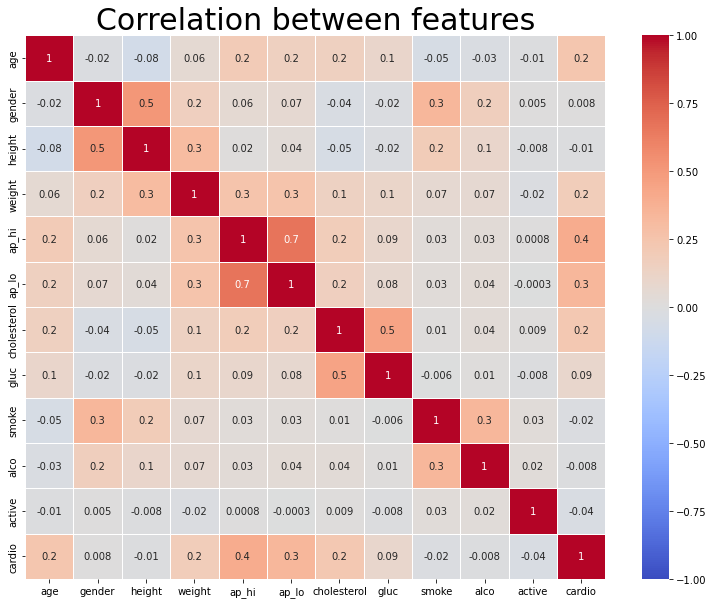

In [ ]:
plt.rcParams.update({'font.size': 10})
fig, ax = plt.subplots(figsize=(13, 10))
sns.heatmap(cvd_data_cleaned.corr(), annot = True,  center= 0, cmap= 'coolwarm',vmin=-1, vmax=1, ax=ax, fmt='.1g', linewidths=.5);
plt.title('Correlation between features', fontsize = 30)
plt.show()

In [ ]:
cvd_data_cleaned = cvd_data_cleaned.drop(columns=["ap_lo"])

In [ ]:
cvd_data_scaled=cvd_data_cleaned.copy()

columns_to_scale = ['age', 'weight', 'ap_hi','height']

stdscaler = StandardScaler()
cvd_data_scaled[columns_to_scale] = stdscaler.fit_transform(cvd_data_cleaned[columns_to_scale])

cvd_data_scaled.head()

,age,gender,height,weight,ap_hi,cholesterol,gluc,smoke,alco,active,cardio
0,-0.434132,2,0.453195,-0.850710,-0.926193,1,1,0,0,1,0
1,0.309378,1,-1.061678,0.768277,0.774598,3,1,0,0,1,1
2,-0.246127,1,0.074477,-0.709928,0.207667,3,1,0,0,0,1
3,-0.746123,2,0.579435,0.557105,1.341528,1,1,0,0,1,1
4,-0.806495,1,-1.061678,-1.273054,-1.493123,1,1,0,0,0,0


In [ ]:
cardio_scaled_mm=cardio_cleaned.copy()
columns_to_scale_mm = ['age', 'weight', 'ap_hi','height']
mmscaler = MinMaxScaler()
cardio_scaled_mm[columns_to_scale_mm] = mmscaler.fit_transform(cardio_cleaned[columns_to_scale_mm])

cardio_scaled_mm.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0.588076,2,0.585106,0.326923,0.434783,80,1,1,0,0,1,0
1,0.730159,1,0.457447,0.474359,0.565217,90,3,1,0,0,1,1
2,0.624003,1,0.553191,0.339744,0.521739,70,3,1,0,0,0,1
3,0.528455,2,0.595745,0.455128,0.608696,100,1,1,0,0,1,1
4,0.516918,1,0.457447,0.288462,0.391304,60,1,1,0,0,0,0


In [ ]:
X_cardio = cvd_data_scaled.drop(columns = ['cardio'])
y_cardio = cvd_data_scaled['cardio']

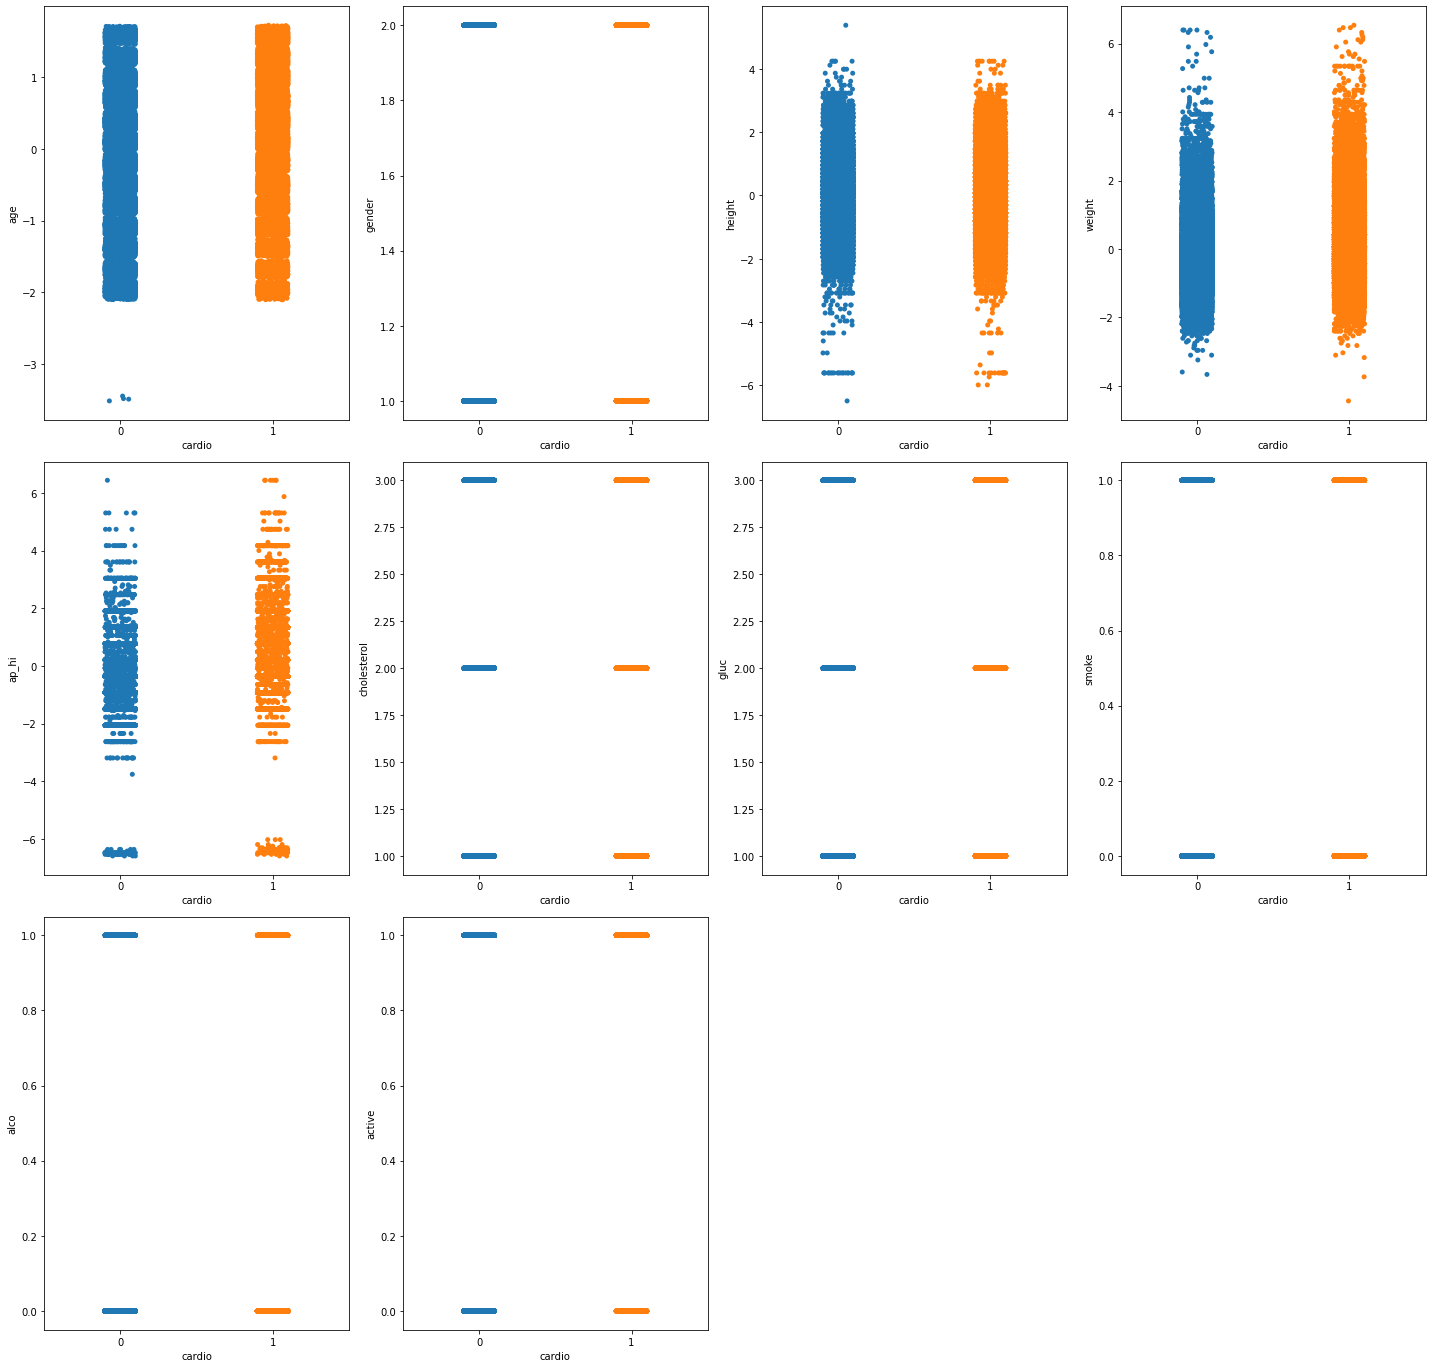

In [ ]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X_cardio:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.stripplot(y_cardio,X_cardio[column])
    plotnumber+=1

plt.tight_layout()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cardio, y_cardio, test_size = 0.30, random_state = 0)

In [ ]:
print("Gradient Boost Classifier")
grad_params = {'n_estimators' : list(range(50,100,10)),'max_depth' : list(range(3,11,1))}
grad = GridSearchCV(GradientBoostingClassifier(), grad_params,n_jobs=-1,cv=10,scoring='recall')
grad.fit(X_train, y_train)
grad_boost = grad.best_estimator_
print("Best Estimator")
print(grad_boost)

Gradient Boost Classifier
Best Estimator
GradientBoostingClassifier(max_depth=5, n_estimators=90)


Accuracy: 0.7309032820214929
Sensitivity (TPR) = 0.6892671949907054

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.72      0.77      0.74     10437
           1       0.75      0.69      0.72     10221

    accuracy                           0.73     20658
   macro avg       0.73      0.73      0.73     20658
weighted avg       0.73      0.73      0.73     20658



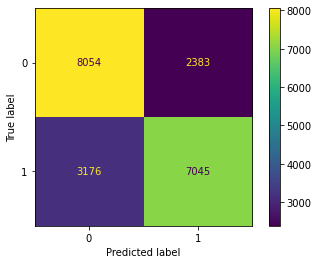

In [ ]:
 
booster_def = GradientBoostingClassifier(max_depth=5,n_estimators=90, min_samples_split=1200, min_samples_leaf=80, max_features=10, subsample=0.75)
boost_model = booster_def.fit(X_train, y_train)

y_pred = boost_model.predict(X_test)

boosting_acc = accuracy_score(y_test, y_pred) 
cm_bossting = confusion_matrix(y_test, y_pred)  
tpr_boost = cm_bossting[1][1] /(cm_bossting[1][0] + cm_bossting[1][1]) 

print('Accuracy:', boosting_acc)
print('Sensitivity (TPR) =', tpr_boost)

print('\n Confusion matrix \n \n')
print(classification_report(y_test, y_pred ))

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(boost_model, X_test, y_test)
plt.show()

In [ ]:
y_pred_train = boost_model.predict(X_train)
boosting_acc_train = accuracy_score(y_train, y_pred_train) 
print('Train Accuracy:', boosting_acc_train)

Train Accuracy: 0.7407676348547718




```
age in days
gender - 1: woman, 2: man
height in cm
weight in kg
ap_hi - Systolic blood pressure (first number)
cholestrol - 1: normal, 2: above normal, 3: well above normal
gluc - 1: normal, 2: above normal, 3: well above normal
alco - whether patient takes alcohol or not (0 or 1)
smoke - whether patient smokes or not (0 or 1)
active - physical activity (0 or 1)

```



In [ ]:
new_data = [[9496,	1,	153,	53.0,	110,	1,	1,	0,	0,	1]]
X_new = pd.DataFrame(new_data,columns = ['age',	'gender',	'height',	'weight',	'ap_hi','cholesterol',	'gluc',	'smoke'	,'alco',	'active'])

columns_to_scale = ['age', 'weight', 'ap_hi','height']

X_new[columns_to_scale] = stdscaler.transform(X_new[columns_to_scale])

X_new.head()

,age,gender,height,weight,ap_hi,cholesterol,gluc,smoke,alco,active
0,-4.039042,1,-1.440396,-1.484227,-0.926193,1,1,0,0,1


In [ ]:
from numpy.ma.core import concatenate
y_new_pred = boost_model.predict(X_new)
y_new_pred_df =  pd.DataFrame(y_new_pred, columns=['prediction'])
new_prediction = pd.concat([X_new, y_new_pred_df], axis=1)
new_prediction

,age,gender,height,weight,ap_hi,cholesterol,gluc,smoke,alco,active,prediction
0,-4.039042,1,-1.440396,-1.484227,-0.926193,1,1,0,0,1,0


<BarContainer object of 10 artists>

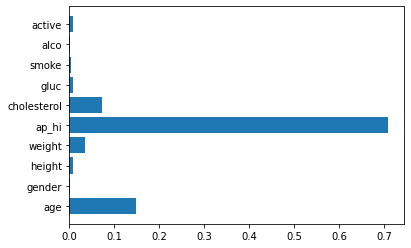

In [ ]:
feature_imp = boost_model.feature_importances_
features = ['age',	'gender',	'height',	'weight',	'ap_hi','cholesterol',	'gluc',	'smoke'	,'alco',	'active']
plt.barh(features, feature_imp, align="center")